In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from FVM_1D_jan2025 import fvm_1D
from coPINN_1D_Robin_Jan2025 import coPINN_1D_Solver

from Residuals_1D import pde_res_compare, robin_residual_compare

device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
# device1 = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
# device2 = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

In [2]:
torch.pi = torch.acos(torch.zeros(1)).item() * 2
L = 1.0

c_1 = 0.5
c_2 = 5.0

h_c = 0.01
T_a = 300.0

alpha = 0.05
beta = 0.1

C_left = 4
C_right = 0

tol_T = 1e-7
tol_C = 1e-8


def S(T):
    return c_1*(-1.0-np.abs(np.sin(T)))
    # return c_1*(-T/1000.0)

def Q(C):
    # return c_2*(-1 + -1*np.abs(np.cos(C)))
    return c_2*(-1.0 - np.cos(10.0*C))
    # return c_2*(-1.0*np.power(C,1))
    # return c_2*(-1.0 - C)

def S_torch(T):
    # return c_1*(-T/1000.0)
    return c_1*(-1.0-torch.abs(torch.sin(T)))

def Q_torch(C):
    return c_2*(-1.0 - torch.cos(10.0*C))
    # return c_2*(-1.0*torch.pow(C,1))

pde_related_funcs = {"heat_source_func":Q,"heat_source_func_torch":Q_torch,"conc_force_func":S,"conc_force_func_torch":S_torch}

problem_constants = {"L":L,"alpha":alpha,"beta":beta,"h_c":h_c,"T_a":T_a,"C_left":C_left,"C_right":C_right}

In [3]:
N_x_1 = 10 #low must be 500 TAKES APPROX 40 SECONDS
max_time = 30 #seconds

T_FVM_1, C_FVM_1, iters1, eps_T1, eps_C1 = fvm_1D(pde_related_funcs,problem_constants,N_x_1,tol_T,tol_C,max_time)

T_right_fvm1 = T_FVM_1[-1]
T_FVM_1 = T_FVM_1[:-1]

T_FVM_norm_1 = np.linalg.norm(T_FVM_1,2)
C_FVM_norm_1 = np.linalg.norm(C_FVM_1,2)


fvm_results_1 = {'T_FVM': T_FVM_1,'C_FVM':C_FVM_1,"T_FVM_norm":T_FVM_norm_1,"C_FVM_norm":C_FVM_norm_1}

Iter:  10000 eps_T:  0.9688371028727261 eps_C:  0.09370592175968939
Iter:  20000 eps_T:  1.2087805895351948 eps_C:  0.07568260469043109
Iter:  30000 eps_T:  2.5407976148988496 eps_C:  0.16838675265288616
Iter:  40000 eps_T:  0.6348277033694671 eps_C:  0.03963024527719483
Iter:  50000 eps_T:  0.05449068112596933 eps_C:  0.006392354510702081
Iter:  60000 eps_T:  0.06027639997665801 eps_C:  0.006698897576516316
Iter:  70000 eps_T:  0.05292502096182261 eps_C:  0.003986037404725362
Iter:  80000 eps_T:  0.9583065092435277 eps_C:  0.08012460063041793
Iter:  90000 eps_T:  0.812837691934476 eps_C:  0.08685795888389514
Iter:  100000 eps_T:  1.1693658677176018 eps_C:  0.09874499882105381
Iter:  110000 eps_T:  2.1272756628762295 eps_C:  0.1291546026322714
Iter:  120000 eps_T:  0.4249811446831018 eps_C:  0.01214500612865832
Iter:  130000 eps_T:  0.11230441273676206 eps_C:  0.0075709614252645885
Iter:  140000 eps_T:  0.05506870571002764 eps_C:  0.00564009577010971
Iter:  150000 eps_T:  0.08864115995

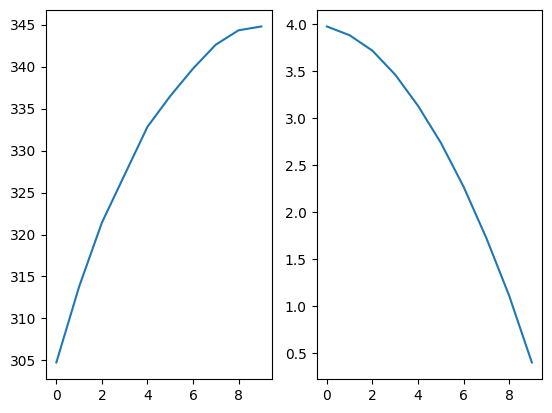

In [4]:
fig,ax = plt.subplots(1,2)
ax[0].plot(T_FVM_1)
ax[1].plot(C_FVM_1)

In [5]:
N_x_2 = 100 #Medium TAKES APPROX 3 Minutes
max_time = 30 #seconds

T_FVM_2, C_FVM_2, iters2, eps_T2,eps_C2 = fvm_1D(pde_related_funcs,problem_constants,N_x_2,tol_T,tol_C,max_time)


T_FVM_norm_2 = np.linalg.norm(T_FVM_2,2)
C_FVM_norm_2 = np.linalg.norm(C_FVM_2,2)

T_right_fvm2 = T_FVM_2[-1]
T_FVM_2 = T_FVM_2[:-1]


fvm_results_2 = {'T_FVM': T_FVM_2,'C_FVM':C_FVM_2,"T_FVM_norm":T_FVM_norm_2,"C_FVM_norm":C_FVM_norm_2}

Iter:  10000 eps_T:  0.011088098880918551 eps_C:  3.8422361635315205e-05
Iter:  20000 eps_T:  0.0031869221055558228 eps_C:  4.80631427455247e-05
Iter:  30000 eps_T:  0.0009164742366465362 eps_C:  1.4620077514848617e-05
Iter:  40000 eps_T:  0.00026088446685434974 eps_C:  3.291518732462251e-06
Iter:  50000 eps_T:  7.577686068316325e-05 eps_C:  1.1182646819651865e-06
Iter:  60000 eps_T:  2.005334619070709e-05 eps_C:  1.7891642423162324e-07
Iter:  70000 eps_T:  5.306277728323039e-06 eps_C:  7.895120512912968e-08
Iter:  80000 eps_T:  1.4369331893249182e-06 eps_C:  2.3169501983666407e-08
Iter:  90000 eps_T:  3.954643830184068e-07 eps_C:  6.772779670427553e-09
Iter:  100000 eps_T:  1.0686352425182122e-07 eps_C:  1.8121335543241912e-09
Elapsed Time 4.357610


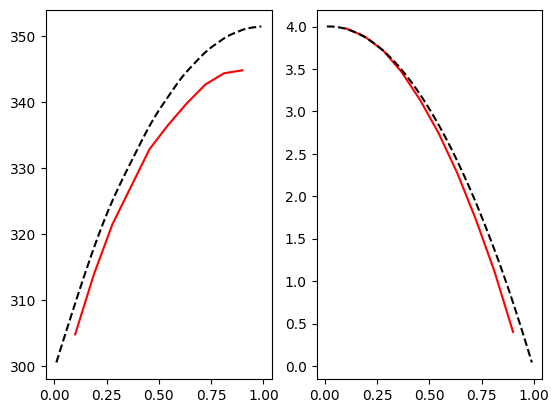

In [6]:
fig,ax = plt.subplots(1,2)
x_1 = np.linspace(0+L/N_x_1,L-L/N_x_1,N_x_1).reshape(-1,1)
x_2 = np.linspace(0+L/N_x_2,L-L/N_x_2,N_x_2).reshape(-1,1)


ax[0].plot(x_1,T_FVM_1,'r')
ax[0].plot(x_2,T_FVM_2,'k--')
ax[1].plot(x_1,C_FVM_1,'r')
ax[1].plot(x_2,C_FVM_2,'k--')

In [7]:
np.max(T_FVM_2)

351.4037412436725

In [8]:
import h5py 

folder ='./FVM_Result_Storage/'

opt = "w" #"r" or "w"

with h5py.File(folder+'FVM_latest.h5',opt) as hf:

    if(opt == "w"):
        FVM1_grp = hf.create_group("FVM_1")
        FVM1_grp.create_dataset('T_FVM',data = T_FVM_1)
        FVM1_grp.create_dataset('C_FVM',data = C_FVM_1)
        FVM1_grp.create_dataset('iters',data = iters1)
        FVM1_grp.create_dataset('eps_T',data = eps_T1)
        FVM1_grp.create_dataset('eps_C',data = eps_C1)

        FVM2_grp = hf.create_group("FVM_2")
        FVM2_grp.create_dataset('T_FVM',data = T_FVM_2)
        FVM2_grp.create_dataset('C_FVM',data = C_FVM_2)
        FVM2_grp.create_dataset('iters',data = iters2)
        FVM2_grp.create_dataset('eps_T',data = eps_T2)
        FVM2_grp.create_dataset('eps_C',data = eps_C2) 

    if(opt == "r"):
        FVM1_grp = hf['FVM_1']
        T_FVM_1 = FVM1_grp['T_FVM'][:]
        C_FVM_1 = FVM1_grp['C_FVM'][:]
        iters1 = FVM1_grp['iters'][:]
        eps_T1 = FVM1_grp['eps_T'][:]
        eps_C1 = FVM1_grp['eps_C'][:]

        FVM2_grp = hf['FVM_2']
        T_FVM_2 = FVM2_grp['T_FVM'][:]
        C_FVM_2 = FVM2_grp['C_FVM'][:]
        iters2 = FVM2_grp['iters'][:]
        eps_T2 = FVM2_grp['eps_T'][:]
        eps_C2 = FVM2_grp['eps_C'][:]



    # hf.create_dataset('T_FVM_1',data = T_FVM_1)
    # hf.create_dataset('C_FVM_1',data = C_FVM_1)

In [9]:
# with h5py.File(folder + "FVM_latest.h5", "r") as f:
#     print("Keys: %s" % f.keys())

#     a_group_key = list(f.keys())[0]

#     # get the object type for a_group_key: usually group or dataset
#     print(type(f[a_group_key])) 
#     data = list(f[a_group_key])

In [10]:
optimizer_algo = "LBFGS" #or Adam
# optimizer_algo = "Adam"
max_iter = 100 #200
# max_iter = 5000

N_f = 10000  #Total number of collocation points 

layers1 = np.array([1,50,50,50,50,1]) #9 hidden layers
layers2 = np.array([1,50,50,50,50,1]) #9 hidden layers

coPINN_constants = {"N_f":N_f,"max_iter" :max_iter,"layers1":layers1,"layers2":layers2,
                    "optimizer_algo":optimizer_algo,"device":device,"fvm_results":fvm_results_2}

In [14]:
coPINN_solver = coPINN_1D_Solver(coPINN_constants,pde_related_funcs,problem_constants,N_x_2)
coPINN_trained = coPINN_solver.train_model(121)

Sequentialmodel(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears1): ModuleList(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1-3): 3 x Linear(in_features=50, out_features=50, bias=True)
    (4): Linear(in_features=50, out_features=1, bias=True)
  )
  (linears2): ModuleList(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1-3): 3 x Linear(in_features=50, out_features=50, bias=True)
    (4): Linear(in_features=50, out_features=1, bias=True)
  )
)
121
0 Train Loss 524.5349 RD T: 0.47278538704017903 RD C: 1.4050742815657924
1 Train Loss 102.755486 RD T: 0.12966206942580139 RD C: 1.2439298648195687
2 Train Loss 90.8256 RD T: 0.12588563439186165 RD C: 1.2187780997631472
3 Train Loss 85.5766 RD T: 0.12449215636399141 RD C: 1.1261751527108081
4 Train Loss 82.559105 RD T: 0.11974008563460255 RD C: 1.1013768723640265
5 Train Loss 54.05626 RD T: 0.1191038881535091 RD C: 0.4285254472929714
6 Train Loss 21.848478 RD T: 0.08387513390830446 RD C: 0.16

In [15]:
T_PINN,C_PINN = coPINN_trained.test()
# T_PINN = T_PINN.reshape(s[0],s[1])
# C_PINN = C_PINN.reshape(s[0],s[1])

In [19]:
# import h5py 

# folder ='./FVM_Result_Storage/'

# with h5py.File(folder+'FVM_1_' + str(N_x_1)+
#                '.h5','w') as hf:
#     hf.create_dataset('T_FVM_1',data = T_FVM_1)
#     hf.create_dataset('C_FVM_1',data = C_FVM_1)

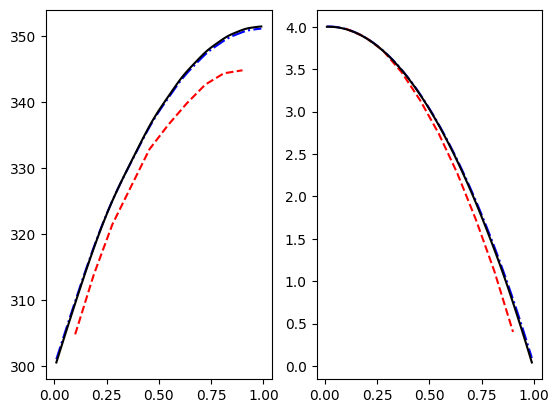

In [16]:

fig,ax = plt.subplots(1,2)

ax[0].plot(x_2,T_PINN,'b-.')
ax[0].plot(x_1,T_FVM_1,'r--')
ax[0].plot(x_2,T_FVM_2,'k-')
# ax[0].plot(x_2000,T_FVM_3,'g')

ax[1].plot(x_2,C_PINN,'b-.')
ax[1].plot(x_1,C_FVM_1,'r--')
ax[1].plot(x_2,C_FVM_2,'k-')
# ax[1].plot(x_2000,C_FVM_3,'g')

In [17]:


def insert_left_right(arr,left,right):
    arr = np.insert(arr,0,left)
    arr = np.append(arr,right)

    return arr

def np_to_torch(arr,device):
    return torch.from_numpy(arr.reshape(-1,1)).float().to(device)

x_2_full = insert_left_right(x_2,0.0,1.0)
x_1_full = insert_left_right(x_1,0.0,1.0)
T_FVM_1_full = insert_left_right(T_FVM_1,300.0,T_right_fvm1)
T_FVM_2_full = insert_left_right(T_FVM_2,300.0,T_right_fvm2)
C_FVM_1_full = insert_left_right(C_FVM_1,C_left,C_right)
C_FVM_2_full = insert_left_right(C_FVM_2,C_left,C_right)
T_PINN = coPINN_trained.forward1(np_to_torch(x_2_full,device)).cpu().detach().numpy()
C_PINN = coPINN_trained.forward2(np_to_torch(x_2_full,device)).cpu().detach().numpy()

In [61]:
np.sqrt(np.mean(np.square(C_FVM_2_full - C_PINN.reshape(-1,))))

0.021413024793704723

In [57]:
T_PINN.shape

(102, 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


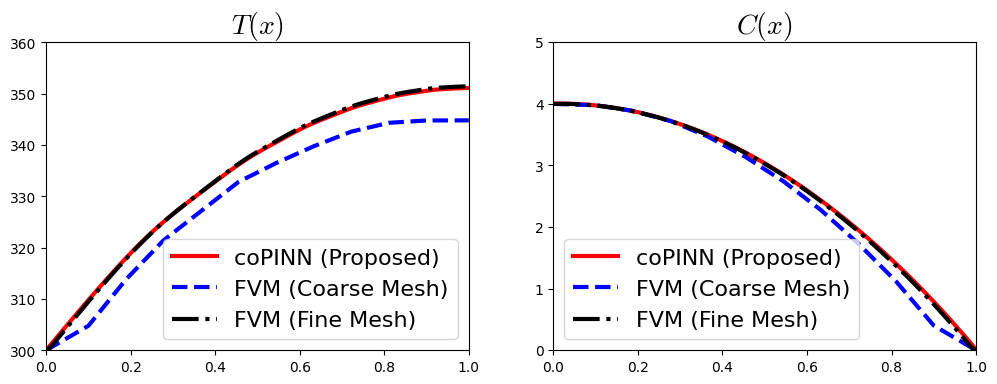

In [63]:

fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,4)

lw = 3 
ax[0].plot(x_2_full,T_PINN,'r-',label = 'coPINN (Proposed)',linewidth = lw)
ax[0].plot(x_1_full,T_FVM_1_full,'b--',label = 'FVM (Coarse Mesh)',linewidth = lw)
ax[0].plot(x_2_full,T_FVM_2_full,'k-.',label = 'FVM (Fine Mesh)',linewidth = lw)
ax[0].set_title('$T(x)$', math_fontfamily = 'cm',fontsize = 20)
ax[0].legend(fontsize = 16)
ax[0].set_xlim([0,1])
ax[0].set_ylim([300,360])
# ax[0].plot(x_2000,T_FVM_3,'g')

ax[1].plot(x_2_full,C_PINN,'r-',label = 'coPINN (Proposed)',linewidth = lw)
ax[1].plot(x_1_full,C_FVM_1_full,'b--',label = 'FVM (Coarse Mesh)',linewidth = lw)
ax[1].plot(x_2_full,C_FVM_2_full,'k-.',label = 'FVM (Fine Mesh)',linewidth = lw)
ax[1].set_title('$C(x)$', math_fontfamily = 'cm', fontsize = 20)
ax[1].legend(fontsize = 16)
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,5])
# fig.tight_layout()

save_name = 'Preds_1D'
formats = ['svg','png','eps','pdf']
folder_base = './Plots/'
folders = ['svg/','png/','eps/','pdf/']

for format in formats:
    fig.savefig(folder_base + format + '/' + save_name+'.'+format,
                format = format,bbox_inches = 'tight',transparent=True)

In [20]:
from scipy.interpolate import CubicSpline

In [20]:
opt = 'neutral'
interp_method = "cubic spline"
N_x_test = N_x_2

T_left = T_a


f1_PINN,f1_fvm1,f2_PINN,f2_fvm1, x_test1 = pde_res_compare(opt,interp_method, pde_related_funcs,
                problem_constants, N_x_test, 
                N_x_1, T_FVM_1,C_FVM_1,T_right_fvm1,T_left,C_right,C_left,
                coPINN_trained,device)

f1_PINN,f1_fvm2,f2_PINN,f2_fvm2, x_test2 = pde_res_compare(opt,interp_method, pde_related_funcs,
                problem_constants, N_x_test, 
                N_x_2, T_FVM_2,C_FVM_2,T_right_fvm2,T_left,C_right,C_left,
                coPINN_trained,device)

PINN_f1: 0.0649
FVM_f1: 3.6177
PINN_f2: 0.1334
FVM_f2: 0.2104
PINN_f1: 0.0482
FVM_f1: 0.5293
PINN_f2: 0.1404
FVM_f2: 0.0707


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


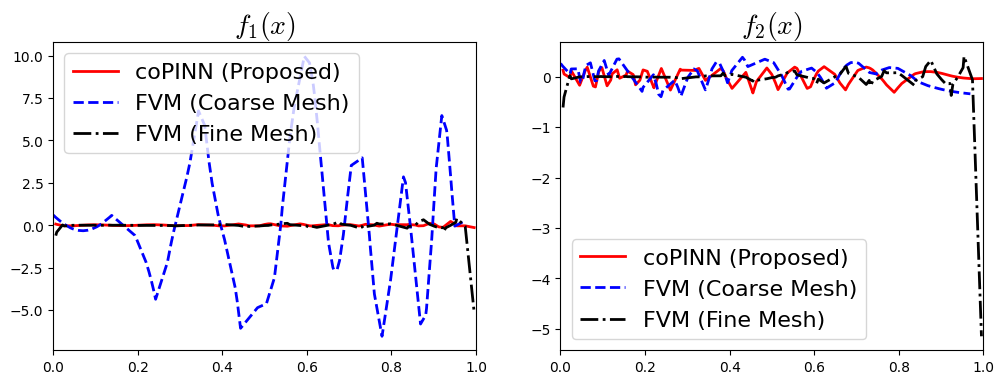

In [64]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,4)

lw = 2
ax[0].plot(x_test2,f1_PINN,'r-',label = 'coPINN (Proposed)',linewidth = lw)
ax[0].plot(x_test1,f1_fvm1,'b--',label = 'FVM (Coarse Mesh)',linewidth = lw)
ax[0].plot(x_test2,f1_fvm2,'k-.',label = 'FVM (Fine Mesh)',linewidth = lw)
ax[0].set_title('$f_1(x)$', math_fontfamily = 'cm',fontsize = 20)
ax[0].legend(fontsize = 16)
ax[0].set_xlim([0,1])
# ax[0].set_ylim([300,360])
# ax[0].plot(x_2000,T_FVM_3,'g')

ax[1].plot(x_test2,f2_PINN,'r-',label = 'coPINN (Proposed)',linewidth = lw)
ax[1].plot(x_test1,f2_fvm1,'b--',label = 'FVM (Coarse Mesh)',linewidth = lw)
ax[1].plot(x_test2,f1_fvm2,'k-.',label = 'FVM (Fine Mesh)',linewidth = lw)
ax[1].set_title('$f_2(x)$', math_fontfamily = 'cm', fontsize = 20)
ax[1].legend(fontsize = 16)
ax[1].set_xlim([0,1])
# ax[1].set_ylim([0,5])
# fig.tight_layout()

save_name = 'Residuals_1D'
formats = ['svg','png','eps','pdf']
folder_base = './Plots/'
folders = ['svg/','png/','eps/','pdf/']

for format in formats:
    fig.savefig(folder_base + format + '/' + save_name+'.'+format,
                format = format,bbox_inches = 'tight',transparent=True)

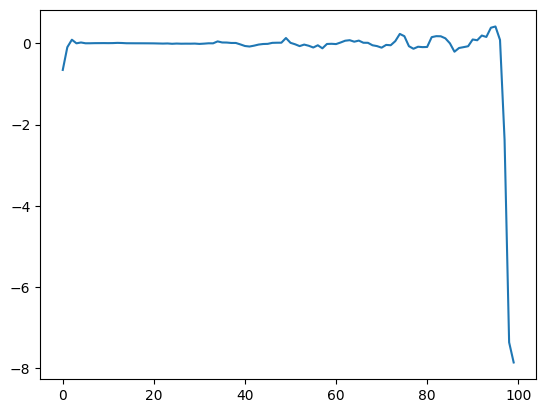

In [42]:
r_fvm1, r_PINN = robin_residual_compare(problem_constants, N_x_1,T_FVM_1,T_right_fvm1,T_left,coPINN_trained,device)

r_fvm2, r_PINN = robin_residual_compare(problem_constants, N_x_2,T_FVM_2,T_right_fvm2,T_left,coPINN_trained,device)

print("Robin Residuals f1:",r_fvm1)
print("Robin Residuals f2:",r_fvm2)
print("Robin Residuals PINN:",r_PINN)

Robin Residuals f1: 2.5996506929248384
Robin Residuals f2: 1.6411002825876375
Robin Residuals PINN: [[0.00213051]]


In [ ]:
#PINN's Dirichlet residuals
res_T_left = coPINN_trained.forward1(torch.tensor([[0.0]]).to(device))-T_left
res_C_left = coPINN_trained.forward2(torch.tensor([[0.0]]).to(device))-C_left
res_C_right = coPINN_trained.forward2(torch.tensor([[L]]).to(device))-C_right

print("Dirichlet Residuals T_left:",res_T_left.item())
print("Dirichlet Residuals C_left:",res_C_left.item())
print("Dirichlet Residuals C_right:",res_C_right.item()) 

Dirichlet Residuals T_left: 0.00262451171875
Dirichlet Residuals C_left: 0.0032792091369628906
Dirichlet Residuals C_right: 0.011780709028244019
